In [1]:
# Confirming I have pandas installed

import pandas as pd

print(pd.__version__)

2.2.2


In [2]:
# Load Sales Data 

sales_data = pd.read_csv('data/sample_superstore.csv')
print(sales_data.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [ ]:
# Calculate Total Sales per Product (by Sub-Category)

# Group the sales data by 'Sub-Category' and sum the 'Sales' column for each group
# reset_index() converts the result from a Series back to a DataFrame
product_sales = sales_data.groupby('Sub-Category')['Sales'].sum().reset_index()

# Rename the columns to more descriptive names: 'Sub-Category' -> 'Product', 'Sales' -> 'Total Sales'
product_sales.columns = ['Product', 'Total Sales']

# Sort the products by 'Total Sales' in descending order (highest sales first)
# ascending=False means sort from highest to lowest
product_sales = product_sales.sort_values('Total Sales', ascending=False)

# Display the results showing each product and its total sales
print(product_sales)

        Product  Total Sales
13       Phones  330007.0540
5        Chairs  328449.1030
14      Storage  223843.6080
16       Tables  206965.5320
3       Binders  203412.7330
11     Machines  189238.6310
0   Accessories  167380.3180
6       Copiers  149528.0300
4     Bookcases  114879.9963
1    Appliances  107289.0010
9   Furnishings   91705.1640
12        Paper   78479.2060
15     Supplies   46673.5380
2           Art   27118.7920
7     Envelopes   16476.4020
10       Labels   12486.3120
8     Fasteners    3024.2800


In [4]:
# Rank Products by Total Sales

ranked_products = product_sales.sort_values(by='Total Sales', ascending=False)
ranked_products['Rank'] = range(1, len(ranked_products) + 1)
print(ranked_products.head())

    Product  Total Sales  Rank
13   Phones   330007.054     1
5    Chairs   328449.103     2
14  Storage   223843.608     3
16   Tables   206965.532     4
3   Binders   203412.733     5


In [5]:
# Identify Top 5 Selling Products

top_5_products = ranked_products.head(5)
print('Top 5 Selling Products:')
print(top_5_products)

Top 5 Selling Products:
    Product  Total Sales  Rank
13   Phones   330007.054     1
5    Chairs   328449.103     2
14  Storage   223843.608     3
16   Tables   206965.532     4
3   Binders   203412.733     5


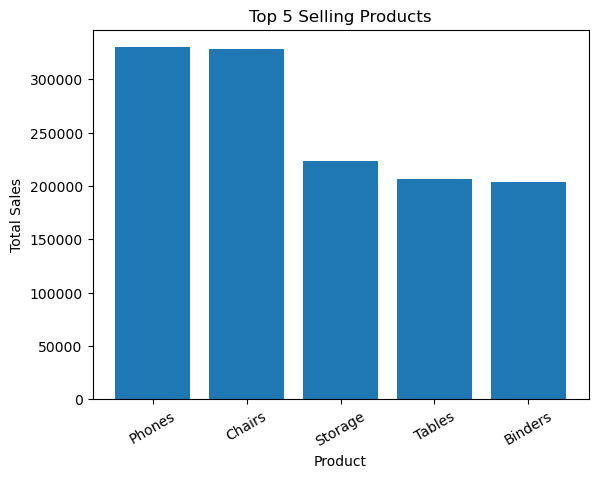

In [11]:
# Visualize Top 5 Products 

import matplotlib.pyplot as plt

plt.bar(top_5_products['Product'], top_5_products['Total Sales'])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 5 Selling Products')
plt.xticks(rotation=30, ha='center')
plt.show()